In [ ]:
# Third party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
from matplotlib.colors import LinearSegmentedColormap
# twinLab import
import twinlab as tl
tl.set_user("")
tl.set_api_key("")

    pressure_inlet  logdiffusivity  p_out_grad
0        24.407069       -9.051797    0.001590
1        21.535310       -8.085824    0.011575
2        48.586805       -8.376130    0.009937
3        33.478117       -8.149854    0.013022
4        39.583867       -9.283216    0.001219
5        20.057897       -8.408130    0.005753
6        42.355154       -8.217607    0.012885
7        25.939696       -8.242950    0.009337
8        29.918167       -8.179772    0.011506
9        34.782748       -8.663882    0.004479
10       31.672320       -8.489044    0.006207
11       35.536693       -8.265945    0.010583
12       27.068034       -8.028048    0.014786
13       28.538582       -8.734796    0.003458
14       36.525060       -8.305127    0.009896
15       39.288837       -8.066291    0.016884
16       44.706934       -8.019581    0.019954
17       46.820241       -8.805728    0.003841
18       47.595249       -8.117584    0.016906
19       42.682779       -8.576275    0.006034


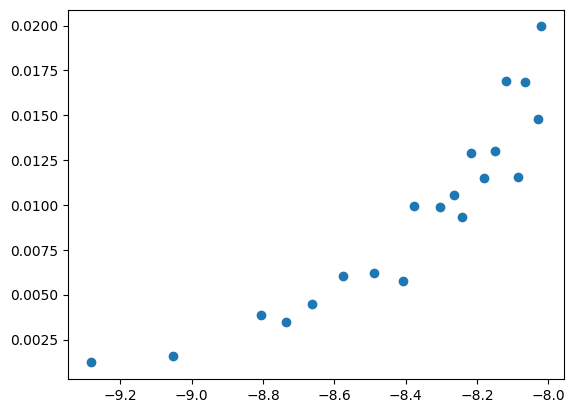

In [102]:
df = pd.read_excel("Book1.xlsx")
df_train = pd.DataFrame({
    "pressure_inlet": df["pressure_inlet"][:20],
    "logdiffusivity":np.log10(df["diffusivity"][:20]),
    "p_out_grad":df["p_out_grad"][:20]

})
print(df_train)

plt.scatter(df_train["logdiffusivity"],df_train["p_out_grad"])

In [103]:
# Define the name of the dataset
dataset_id = "UoM_dataset"

# Intialise a Dataset object
dataset = tl.Dataset(id=dataset_id)

# Upload the dataset
dataset.upload(df_train, verbose=True)

Dataframe is uploading.
Dataset successfully uploaded.


In [104]:
# Initialise emulator
emulator_id = "UoM_emulator"

emulator = tl.Emulator(id=emulator_id)

# Define the training parameters for your emulator
output_columns = ["p_out_grad"]
params = tl.TrainParams(
    train_test_ratio=1,
    estimator="gaussian_process_regression",

)

# Train the emulator using the train method
emulator.train(
    dataset=dataset,
    inputs=["logdiffusivity"],
    outputs=output_columns,
    params=params,
    verbose=True,
)

Emulator 'UoM_emulator' has begun training.
0:00:00: Job status: processing
0:00:01: Job status: processing
0:00:04: Job status: processing
0:00:06: Job status: processing
0:00:08: Job status: processing
0:00:11: Job status: success
Training of emulator UoM_emulator is complete!


In [109]:
npoints = 100

X, Y = np.meshgrid(np.linspace(20,50,npoints), np.linspace(-9.5,-8,npoints))

df_test = pd.DataFrame({
    "pressure_inlet": X.flatten(),
    "logdiffusivity": Y.flatten(),
})

df_pred,df_std = emulator.predict(df_test)


Job predict process ID: predict-abiding-shared-parade
0:00:00: Job status: processing
0:00:01: Job status: processing
0:00:03: Job status: processing
0:00:05: Job status: processing
0:00:09: Job status: processing
0:00:12: Job status: success
Mean predictions:
      p_out_grad
0       0.002740
1       0.002740
2       0.002740
3       0.002740
4       0.002740
...          ...
9995    0.016721
9996    0.016721
9997    0.016721
9998    0.016721
9999    0.016721

[10000 rows x 1 columns]
Standard deviation predictions:
      p_out_grad
0       0.003014
1       0.003014
2       0.003014
3       0.003014
4       0.003014
...          ...
9995    0.001760
9996    0.001760
9997    0.001760
9998    0.001760
9999    0.001760

[10000 rows x 1 columns]


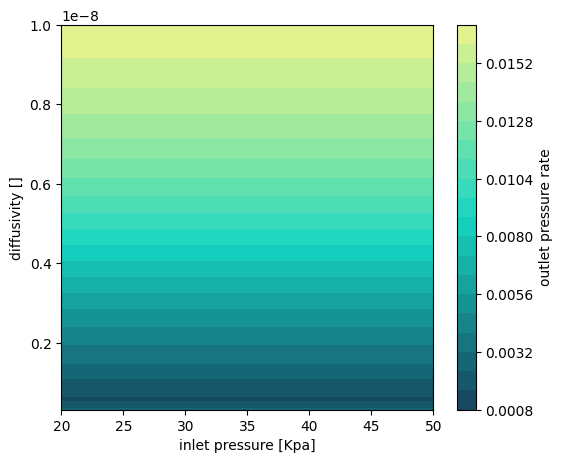

Text(0, 0.5, 'diffusivity []')

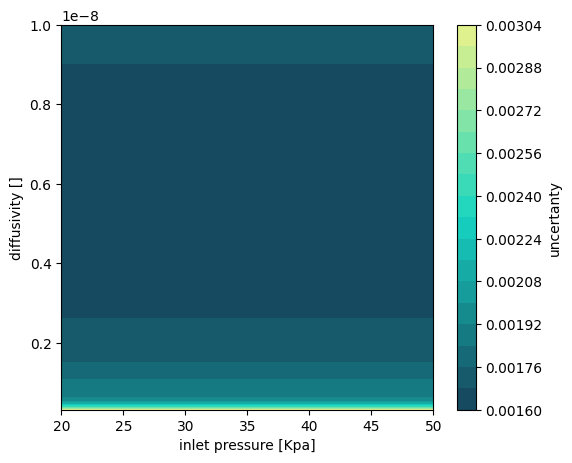

In [115]:
# plot the outputs of the emulator

plt.figure(figsize=(6, 5))
colors = ["#16425B","#16D5C2","#EBF38B"]
custom_cmap = LinearSegmentedColormap.from_list("bah", colors) 

Z = np.array(df_pred["p_out_grad"]).reshape(npoints,npoints)
plt.contourf(X, 10**(Y), Z, levels=20, cmap=custom_cmap)  # filled contours
plt.colorbar(label="outlet pressure rate")
plt.xlabel("inlet pressure [Kpa]")
plt.ylabel("diffusivity []")
plt.show()

plt.figure(figsize=(6, 5))

Zerr = np.array(df_std["p_out_grad"]).reshape(npoints,npoints)
plt.contourf(X, 10**(Y), Zerr, levels=20, cmap=custom_cmap)  # filled contours
plt.colorbar(label="uncertanty")
plt.xlabel("inlet pressure [Kpa]")
plt.ylabel("diffusivity []")